# Лабораторная работа №6 "Проверка гипотезы про однородность выборок при помощи статистики Петунина"

## Теоретическая часть


[**Статистика Петунина**](https://uk.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%9F%D0%B5%D1%82%D1%83%D0%BD%D1%96%D0%BD%D0%B0)($p$-статистика) -- мера близости между выборками, предложенная украинским матемаиком Юрием Петуниным. Используется для проверки гипотезы про равенство функций распределения двух выборок.

Рассмотрим две генеральные совокупности $G$ и $G'$ и соответствующие функции распределения $F_G$ и $F_{G'}$. Пусть $x = (x_1, x_2 , \ldots, x_n) \in G$ и $x' = (x_1', x_2', \ldots, x_m') \in G'$, а $x_{(1)} \le x_{(2)} \le \ldots \le x_{(n)}$ и $x_{(1)}' \le x_{(2)}' \le \ldots \le x_{(m)}'$ -- соответствующие порядковые статистики. Пусть $F_G(u) = F_{G'}(u)$, тогда

$$
P(A_{ij}) = P \left(x_k' \in (x_{(i)}, x_{(j)}) \right) = p_{ij} = \frac{j-i}{n+1}
$$

Если имеем выборку $x' \in (x_{(1)}', x_{(2)}', \ldots, x_{(m)}' )$, то можем найти частоту $h_{ij}$ события $A_{ij}$ и доверительные интервалы $(p_{ij}^{(1)},p_{ij}^{(2)})$ для вероятности $p_{ij}$ при заданном уровне значимости $\beta$, то есть $B = \left\{ p_{ij} \in (p_{ij}^{(1)},p_{ij}^{(2)})\right\}$, $P(B) = 1 - \beta$. Тогда

$$
p_{ij}^{(1)} = \frac{h_{ij}m + \frac{g^2}{2} - g \sqrt{h_{ij}(1 - h_{ij})m + \frac{g^2}{4}}}{m + g^2} \\
p_{ij}^{(2)} = \frac{h_{ij}m + \frac{g^2}{2} + g \sqrt{h_{ij}(1 - h_{ij})m + \frac{g^2}{4}}}{m + g^2}
$$

где $g$ удоволетворяет условию $\phi(g) = 1 - \frac{\beta}{2}$ ($\phi(g)$ -- плотность нормального распределения). Положим $g = 3$. Величина $g$ определяет уровень значимости доверительного интервала $I^{(n,m)}_{ij} = (p_{ij}^{(1)},p_{ij}^{(2)})$. Согласно правилу $3\sigma$ при $g = 3$ уровень значимости этого интервала не превышает $0.05$.

Обозначим через $N$ все доверительные интервалы $I_{i,j} = (p_{ij}^{(1)},p_{ij}^{(2)})$ ($N = \frac{n(n-1)}{2}$) и $L$ -- количество интералов $I_{ij}$, которые содержат вероятность $p_{ij}$, то есть $p_{ij} \in I_{ij}$.  Положим

$$
h = \rho(x, x') = \frac{L}{N}
$$

Статистика $h$ назвается $p$-статистикой (статистикой Петунина), она является мерой близости $\rho(x, x')$ между выборками $x$, $x'$.

## Практическая часть

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [3]:
def p_stat(x, y, g = 3):
    """
        статистика Петунина
    """
    
    x = np.sort(x)
    
    n = x.shape[-1]
    m = y.shape[-1]
    
    # массив частот
    h_arr = np.zeros((n,n))
    
    for j in range(1,n):
        for i in range(j):
            for k in range(m):
                if x[i] <= y[k] <= x[j]:
                    h_arr[i,j] += 1
            
    h_arr = h_arr / m
        
    _term = g*np.sqrt(h_arr * (1 - h_arr) * m + g**2/4)
    
    # массивы границ интервалов
    p_arr_1 = (h_arr*m + g**2/2 - _term)/(m + g**2)
    p_arr_2 = (h_arr*m + g**2/2 + _term)/(m + g**2)
    
    L = np.logical_and(p_arr_1 < h_arr, h_arr < p_arr_2).sum()
    N = n*(n-1)/2
    
    return L/N

Проведем тестирование на нормальном распределении возьмем выборку из $N(0,1)$, размером $m = 200$.

In [4]:
y = np.random.normal(0,1, size = 200)

***
### Смещение по мат. ожиданию
Проверим гипотезу про равенство функций распределения для распределений $N(\mu, 1)$ , где $\mu$ меняется от $-2$ до $2$ с шагом $0.1$. Размер каждой выборки $100$

In [5]:
mu_arr = np.arange(-2,2+0.1,0.1)
results = np.zeros(mu_arr.shape)

n = 100
for index, mu in enumerate(mu_arr):
    x = np.random.normal(mu,1, size = n)
    results[index] = p_stat(x,y)

Text(0.5, 1.0, 'Проверка гипотезы при смещении по мат. ожиданию')

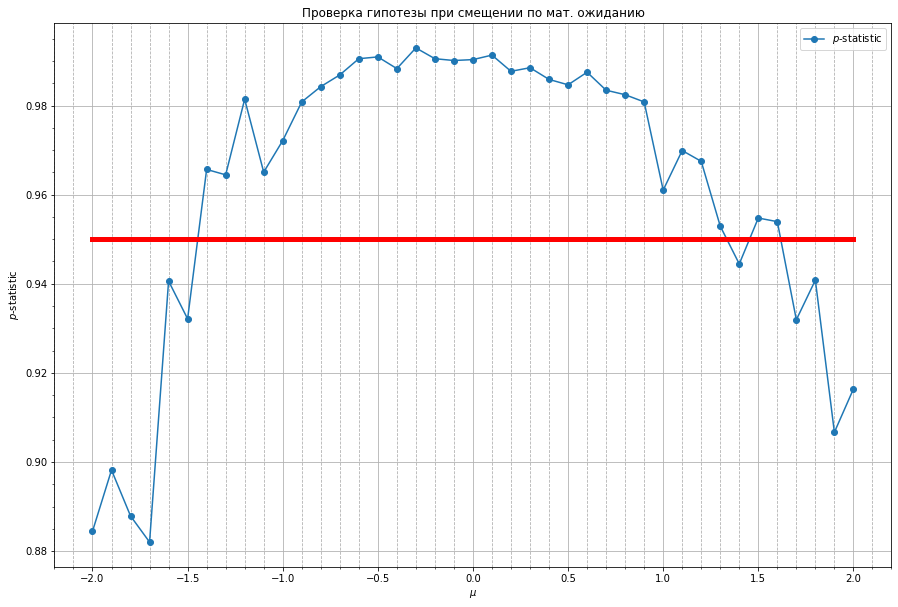

In [6]:
fig = plt.figure(figsize = (15,10))
plt.plot(mu_arr, results, 'o-', label = '$p$-statistic')
plt.plot(mu_arr, np.ones(mu_arr.shape)*0.95, c = 'r', lw = 5)
plt.minorticks_on()
plt.grid(True)
plt.grid(b=True,which='minor', linestyle='--', axis = 'x')
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('$p$-statistic')
plt.title('Проверка гипотезы при смещении по мат. ожиданию')

Не отклоняют гипотезу следующие значения $\mu$

In [7]:
np.round(mu_arr[results > 0.95],2)

array([-1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4,
       -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,
        0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.5,  1.6])

***

### Смещение по среднеквадратическому отклонению
Проверим гипотезу про равенство функций распределения для распределений $N(0, \sigma)$ , где $\sigma$ меняется от $0.1$ до $3$ с шагом $0.1$. Размер каждой выборки $100$

In [8]:
sigma_arr = np.arange(0.1,3+0.1,0.1)
results = np.zeros(sigma_arr.shape)

n = 100
for index, sigma in enumerate(sigma_arr):
    x = np.random.normal(0,sigma, size = n)
    results[index] = p_stat(x,y)

Text(0.5, 1.0, 'Проверка гипотезы при смещении по $\\sigma$')

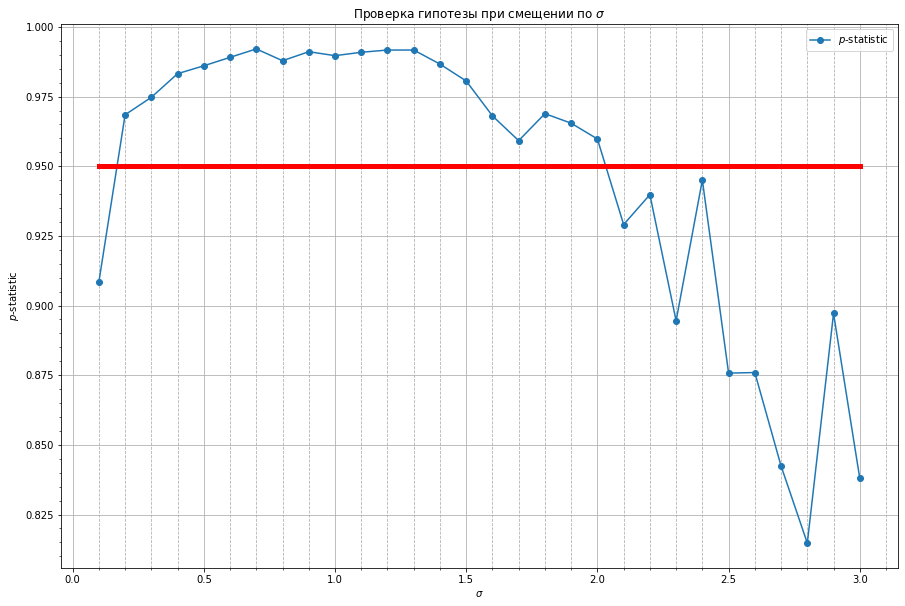

In [9]:
fig = plt.figure(figsize = (15,10))
plt.plot(sigma_arr, results, 'o-', label = '$p$-statistic')
plt.plot(sigma_arr, np.ones(sigma_arr.shape)*0.95, c = 'r', lw = 5)
plt.minorticks_on()
plt.grid(True)
plt.grid(b=True,which='minor', linestyle='--', axis = 'x')
plt.legend()
plt.xlabel('$\sigma$')
plt.ylabel('$p$-statistic')
plt.title('Проверка гипотезы при смещении по $\sigma$')

Не отклоняют гипотезу следующие значения $\sigma$

In [10]:
np.round(sigma_arr[results > 0.95],2)

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. ])